In [1]:
import numpy as np
import pandas as pd

data = pd.read_csv(r'/Users/kittysu/Documents/Projects/PyFly/encoded_data.csv', index_col = None, header=0) 
data.drop('departure_date', axis=1, inplace=True)
data.drop_duplicates(inplace = True) 

data.tail()

,airfare,duration,num_stops,days_to_departure,day_of_week,departure_category,arrival_category,airline,day_of_year
31630,975,26.2,2,31,0,1,0,22,105
31631,975,26.8,2,31,0,1,0,22,105
31632,975,27.3,2,31,0,1,0,22,105
31633,975,28.3,2,31,0,1,0,22,105
31634,975,29.3,2,31,0,1,0,22,105


In [2]:
# BUY OR WAIT
data['buy'] = 0

# For each departure date
dates = data['day_of_year'].unique()
for d in dates:
    
    temp_df_1 = data[data['day_of_year'] == d]
    
    # For each purchase date
    days_to_depart = temp_df_1['days_to_departure'].unique()  
    
    for dd in days_to_depart:
        
        if (dd != 1):
            
            temp_df_2 = temp_df_1[temp_df_1['days_to_departure'] == dd]
            temp_min_2 = temp_df_2['airfare'].min()

            temp_df_3 = temp_df_1[temp_df_1['days_to_departure'] < dd]
            temp_min_3 = temp_df_3['airfare'].min()
        
            if (temp_min_2 <= temp_min_3):
                
                row = temp_df_2['airfare'].idxmin()
                data.at[row, 'buy'] = 1
                
        else:
            
            row = temp_df_1['airfare'].idxmin()
            data.at[row, 'buy'] = 1
            
data.tail()

,airfare,duration,num_stops,days_to_departure,day_of_week,departure_category,arrival_category,airline,day_of_year,buy
31630,975,26.2,2,31,0,1,0,22,105,0
31631,975,26.8,2,31,0,1,0,22,105,0
31632,975,27.3,2,31,0,1,0,22,105,0
31633,975,28.3,2,31,0,1,0,22,105,0
31634,975,29.3,2,31,0,1,0,22,105,0


In [10]:
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression  
from sklearn.svm import SVC 
from sklearn.ensemble import RandomForestClassifier  
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Split training and testing 
array = data.values
X = array[:,0:9]
y = array[:,9]

scoring = 'accuracy'

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.33, random_state=7)

models = []
models.append(('LR', LogisticRegression(solver='lbfgs', multi_class='multinomial')))
models.append(('SVM', SVC(gamma='auto')))
models.append(('RF', RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0)))
models.append(('NN', MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(150, 10), random_state=1)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))

print("done")

done


In [5]:
# Calculate accuracy
results = []
names = []
for name, model in models:
        kfold = model_selection.KFold(n_splits=10, random_state=7)
        cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

LR: 0.992573 (0.001318)
SVM: 0.992453 (0.001262)
RF: 0.993471 (0.001377)
NN: 0.992273 (0.001298)
KNN: 0.993591 (0.001695)
CART: 0.990776 (0.002760)
NB: 0.932974 (0.006421)


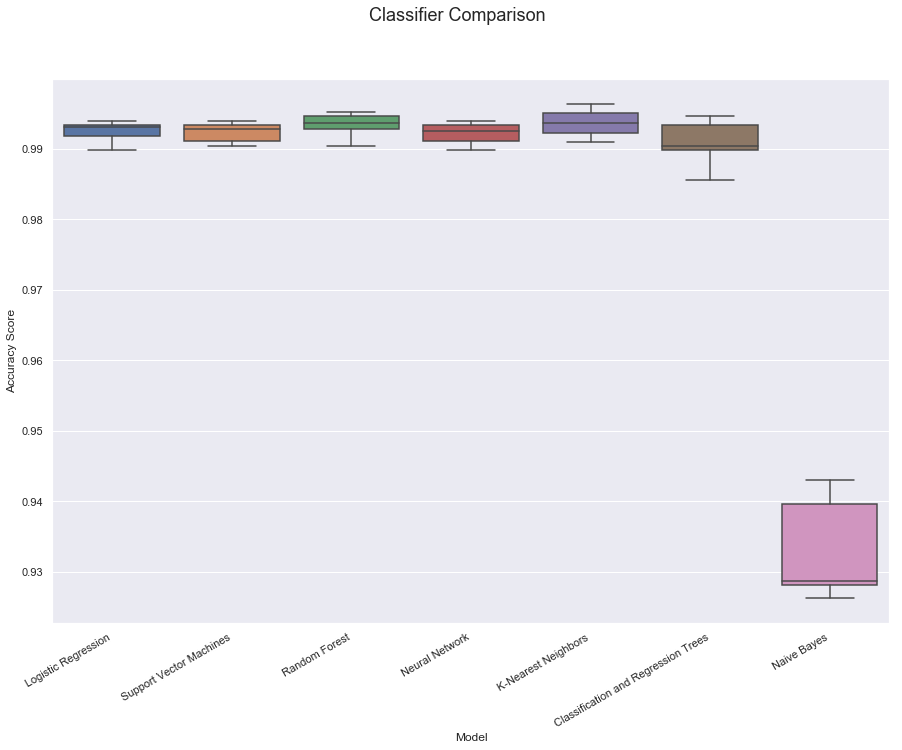

In [27]:
# Compare models
fig, ax = plt.subplots()
fig.set_size_inches(15, 10, forward=True)

names = ['Logistic Regression', 'Support Vector Machines', 'Random Forest', 'Neural Network', 'K-Nearest Neighbors', 'Classification and Regression Trees', 'Naive Bayes']

sns.set(style="darkgrid")
sns.boxplot(x=names, y=results)

plt.suptitle('Classifier Comparison', fontsize=18)

plt.xlabel('Model', fontsize=12)
plt.ylabel('Accuracy Score', fontsize=12)

plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')

plt.show()

In [25]:
# Predict on testing set
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)

print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.9913667315175098
[[8145   15]
 [  56    8]]
             precision    recall  f1-score   support

        0.0       0.99      1.00      1.00      8160
        1.0       0.35      0.12      0.18        64

avg / total       0.99      0.99      0.99      8224

